# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data comes from csv file. 
The data is related to SAT scores for each state and it contains 4 columns - State, Rate, Math and Verbal.


##### 2. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete. Some of the values in the State column may not be correct.

##### 3. Create a data dictionary for the dataset.

The data can be separated with key, value combination for each column - Example - {State : ['AL, 'GA' ...]}

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import csv
import math
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
#import plotly
#import plotly.plotly as py
#import plotly.graph_objs as go

# Initialize plotly notebook mode:
#plotly.offline.init_notebook_mode()

%matplotlib inline

dbFile = '/Users/jb3/DSI-ATL-1/curriculum/02-projects/01-projects-weekly/project-01/assets/sat_scores.csv'
db = pd.read_csv(dbFile, nrows=None)

#JB don't import plotly if not using
#NO ABSOLUTE PATHS!!!!

##### 5. Print the data

In [5]:
db

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


##### 6. Extract a list of the labels from the data, and remove them from the data.

In [6]:
fileData = []
with open(dbFile, 'r') as file:
    fileReader = csv.reader(file)
    for fileRow in fileReader:
        fileData.append(fileRow)

        
#print(fileData)
header = fileData[0]
datafile = fileData[1:]
fileData = fileData[1:]

print(fileData)
        
#fileData = fileRows[1:]
#fileHeader = fileRows[0]
#fileCsv = fileRows[0:]
#fileData

[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12', '550', '550'], ['WY', '11', '547',

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [7]:
def getStateFromList(record): return record[0]
states = map(getStateFromList,fileData)

print states


#stateNames = {}

#for labelIndex, stateColumn in enumerate(fileHeader):
#    stateNames[stateColumn] = []
#    for stateRows in fileData:
#        stateNames[stateColumn].append(stateRows[labelIndex])

#print(stateNames)        
        
#stateNames['State']


['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


##### 8. Print the types of each column

In [8]:
print fileData[1]

#fileRow1 = fileData[1]
#for x in fileRow1:
#    print type(x)

#for i in range(0, len(fileRow1)):
#    print(type(fileRow1[i]))
    
#JB these aren't types

['NJ', '81', '499', '513']


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [9]:
def getCorrectList(fileRecord):
    dataList = [fileRecord[0], int(fileRecord[1]), int(fileRecord[2]), int(fileRecord[3])]
    return dataList

correctList = map(getCorrectList, fileData)

print correctList[1]
    

['NJ', 81, 499, 513]


##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [10]:
def getData(iobj, i):
    return iobj[i]

iDictionary = []
for i in range(0,4):
    data = map(lambda iObj: getData(iObj, i), fileData)
    iDictionary.append(data)
    


Dict1 = {"states" : iDictionary[0],
 "rate" : iDictionary[1],
 "verbal" : iDictionary[2],
 "math" : iDictionary[3]}

print Dict1

#JB good!

{'states': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', 

##### 11. Create a dictionary with the values for each of the numeric columns

In [11]:
Dict2 = {"rate" : iDictionary[1],
 "verbal" : iDictionary[2],
 "math" : iDictionary[3]}

print Dict2

{'rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564'

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [19]:
def printMinMax():
    for key, value in Dict1.items():
        print "Key : " + key
        
        print "Max Value: " + str(max(value))
        print "Min Value: " + str(min(value))
   
    
printMinMax()

    
#JB so max rate is 9 and min is 11?!?!?!?!
# you didn't convert to 'int' so last string number is 9

Key : states
Max Value: WY
Min Value: AK
Key : rate
Max Value: 9
Min Value: 11
Key : math
Max Value: 603
Min Value: 439
Key : verbal
Max Value: 593
Min Value: 482


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [13]:
np.std(db)

Rate      27.037996
Verbal    32.915095
Math      35.666996
dtype: float64

In [14]:
def getDiff(num, avg):
    return (num - avg)**2

def getStdDev(list):
    for key, value in list.items():
        denom = len(value) - 1
        listSum = float(sum(value))
        avg = listSum / denom
        df = map(lambda num: getDiff(num, avg), value)
        dfSum = sum(df)
        var = float(dfSum)/denom
        return math.sqrt(var)

#JB now call it on your data so we can get numbers

## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

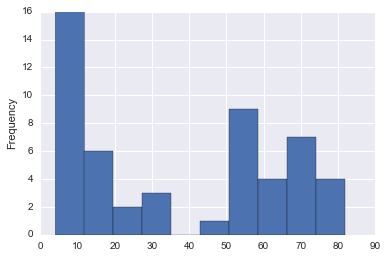

In [15]:
db.Rate.plot(kind="hist")

##### 15. Plot the Math distribution

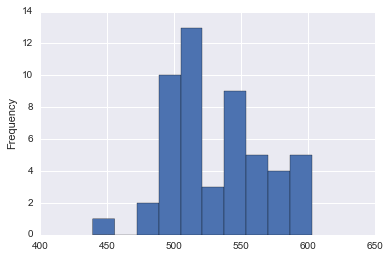

In [16]:
db.Math.plot(kind="hist")

##### 16. Plot the Verbal distribution

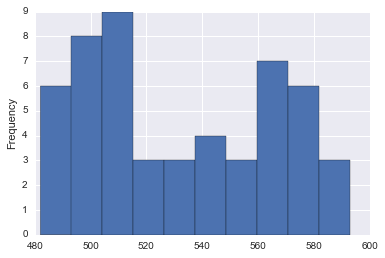

In [17]:
db.Verbal.plot(kind="hist")

##### 17. What is the typical assumption for data distribution?

In [18]:
data distribution is left skewed

#JB no, we assume normal distribution. If skewed, possibly a problem and data we can't use.
# also, change these to markdown cells so they don't throw errors on compile

SyntaxError: invalid syntax (<ipython-input-18-63e0f5bcb299>, line 1)

##### 18. Does that distribution hold true for our data?

In [20]:
yes

NameError: name 'yes' is not defined

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

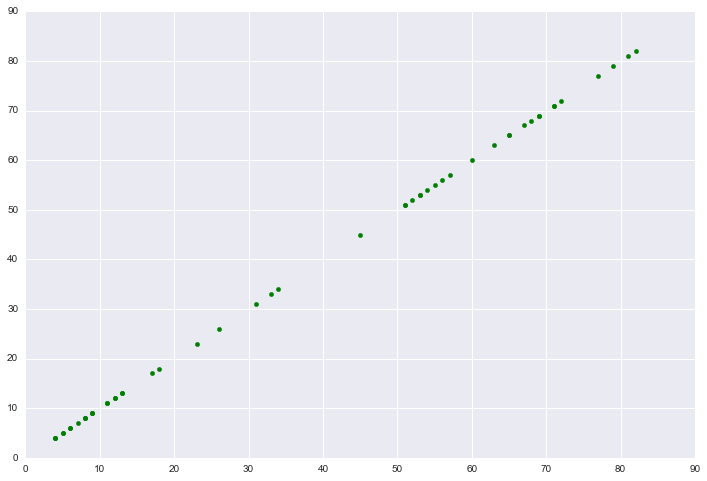

In [22]:
Rate = db.Rate.values
Math = db.Rate.values
Verbal = db.Rate.values

plt.figure(figsize=(12, 8))
plt.scatter(Rate, Math, Verbal, color='g')

#JB only two dimensions on scatter plots, also you're overriding all data at top with rate!

##### 20. Are there any interesting relationships to note?

In [ ]:
The plot is Positive Correlation!

##### 21. Create box plots for each variable. 

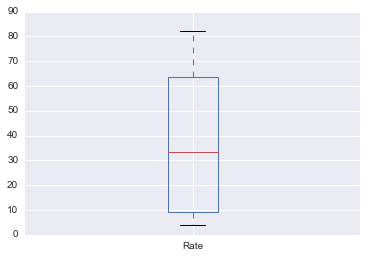

In [23]:
db.Rate.plot(kind="box")

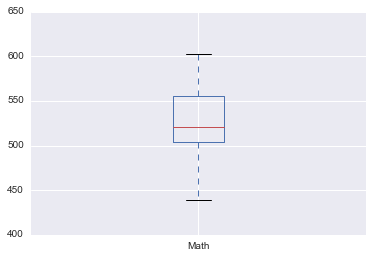

In [24]:
db.Math.plot(kind="box")

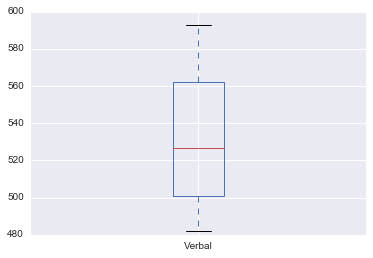

In [25]:
db.Verbal.plot(kind="box")

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [26]:
from IPython.display import Image
Image(filename="C:\DSI\SatyaSagi\Projects\Assets\sat scores map.jpg")

#JB no absolute paths!!!!!!!! And your charts aren't labeled with math or verbal, so we need two clearly labeled maps.

IOError: [Errno 2] No such file or directory: u'C:\\DSI\\SatyaSagi\\Projects\\Assets\\sat scores map.jpg'

In [ ]:
Score: 6/10
Identify: Discuss Data:2
Acquire: Load Data with Python:2
Present: Visualize Data:1
Bonus: Use Tableau:1